## Import Packages and Load Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import statsmodels.api as sm
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library

In [12]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)
# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [13]:
# Get the X,y
X = df[['RM','CRIM']]
y = target["MEDV"] 
X = sm.add_constant(X) # again, this package needs to manually add an intercept (beta_0)

In [14]:
X.head()

,const,RM,CRIM
0,1.0,6.575,0.00632
1,1.0,6.421,0.02731
2,1.0,7.185,0.02729
3,1.0,6.998,0.03237
4,1.0,7.147,0.06905


In [15]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [16]:
# Fit Least Squares Estimate
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)

In [17]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     297.6
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           5.22e-86
Time:                        21:10:41   Log-Likelihood:                -1642.7
No. Observations:                 506   AIC:                             3291.
Df Residuals:                     503   BIC:                             3304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.2447      2.588    -11.300      0.000     -34.330     -24.160
RM             8.3911      0.405     20.726      0.000       7.596       9.186
CRIM          -0.2649      0.033     -8.011      0.000      -0.330      -0.200
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         92.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Make the prediction
predictions = model.predict(X)
# Print out the first 5 predicted values
print(predictions[:5])

0    25.924880
1    24.627095
2    31.037876
3    29.467401
4    30.707953
dtype: float64


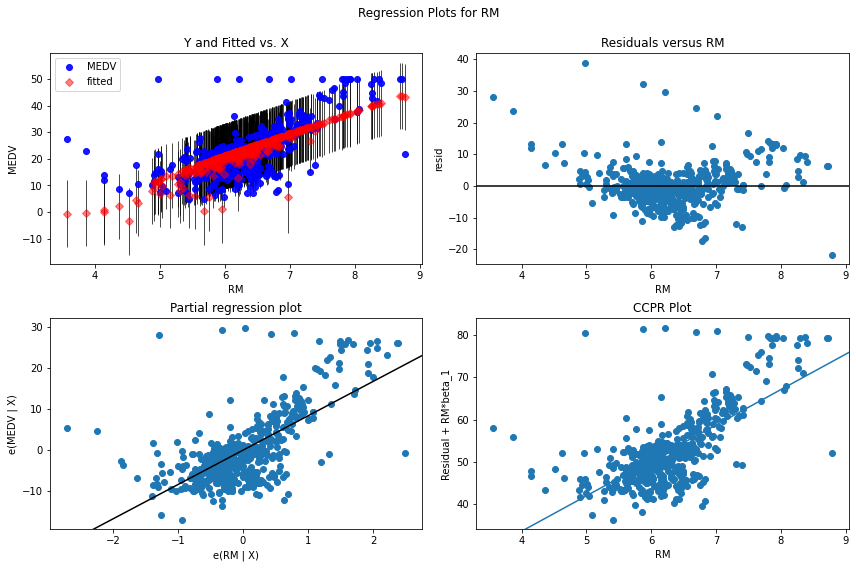

In [19]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'RM', fig=fig)
plt.show()

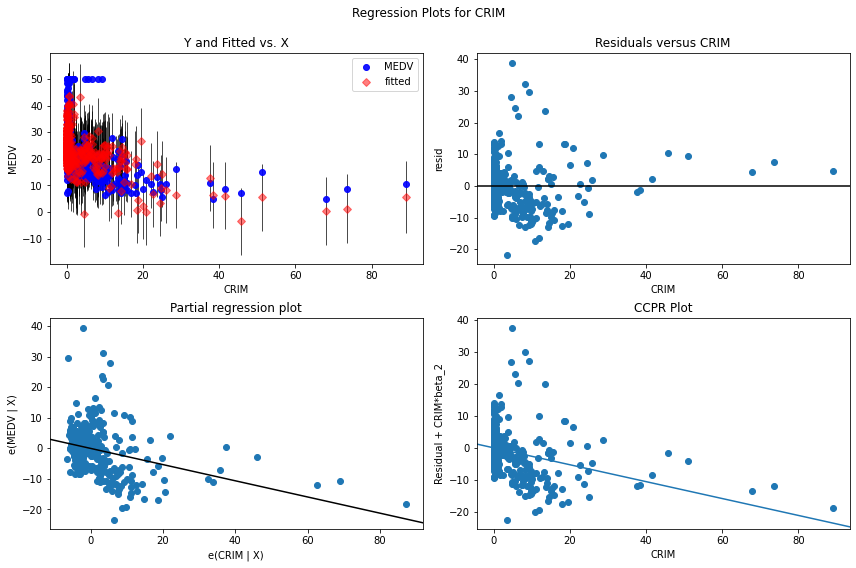

In [22]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'CRIM', fig=fig)
plt.show()